Rayleigh-Taylor instability
======

This notebook models the Rayleigh-Taylor instability outlined in van Keken *et al.* (1997). 

The system of equations is given by

$$
    \nabla \cdot \left( \eta \nabla \dot\varepsilon \right) - \nabla p = -\rho g \mathbf{\hat z}
$$

$$
    \nabla \cdot \mathbf{v} = 0
$$

**Keywords:** particle swarms, Stokes system, advective diffusive systems

**References**

1. van Keken, P.E., S.D. King, H. Schmeling, U.R. Christensen, D.Neumeister and M.-P. Doin. A comparison of methods for the modeling of thermochemical convection. Journal of Geophysical Research, 102, 22,477-22,495, 1997.  
http://onlinelibrary.wiley.com/doi/10.1029/97JB01353/abstract

In [1]:
import UWGeodynamics as GEO
import glucifer

loaded rc file /workspace/user_data/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
res = 64
boxLength = 0.9142
boxHeight = 1.0

# light material viscosity / dense material viscosity
viscosityRatio = 1.0 

In [3]:
Model = GEO.Model(elementRes=(64, 64), 
                  minCoord=(0., 0.), 
                  maxCoord=(boxLength, boxHeight),
                  gravity=(0., -1.0))

In [4]:
import math
import underworld.function as fn

# material perturbation from van Keken et al. 1997
wavelength = 2.0*boxLength
amplitude  = 0.02
offset     = 0.2
k = 2. * math.pi / wavelength

# Create function to return particle's coordinate
coord = fn.coord()

# Define the material perturbation, a function of the x coordinate (accessed by `coord[0]`).
perturbationFn = offset + amplitude*fn.math.cos(k*coord[0])

lightShape = perturbationFn > coord[1] 
densShape = perturbationFn < coord[1]

In [5]:
densMaterial = Model.add_material(name="Dense Material", shape=densShape)
lightMaterial = Model.add_material(name="Light Material", shape=lightShape)

In [6]:
densMaterial.density = 1.0
lightMaterial.density = 0.0

In [7]:
densMaterial.viscosity = 1.0
lightMaterial.viscosity = 1.0


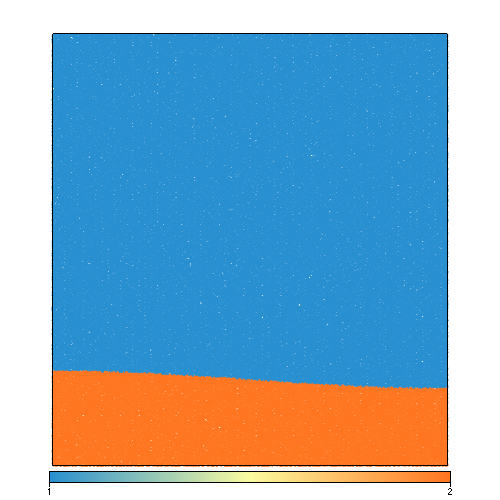

In [8]:
Fig = glucifer.Figure(figsize=(500, 500))
Fig.Points(Model.swarm, Model.materialField, fn_size=3.0)
Fig.show()

In [9]:
Model.set_velocityBCs(left=[0, None], right=[0., None], top=[0., 0.], bottom=[0.,0.])

In [10]:
Model.init_model()

In [11]:
!rm -rf outputs
Model.run_for(nstep=300, checkpoint_interval=10)

Running with UWGeodynamics version 0.9.8b-dev-29e4c3b(development)
Step:1 Model Time:  17.104236356263677 year dt: 17.104236356263677 year (2018-11-27 19:47:35)
Step:2 Model Time:  31.291112925588283 year dt: 14.186876569324605 year (2018-11-27 19:47:36)
Step:3 Model Time:  43.54232873088367 year dt: 12.251215805295383 year (2018-11-27 19:47:37)
Step:4 Model Time:  54.49621251549775 year dt: 10.953883784614094 year (2018-11-27 19:47:38)
Step:5 Model Time:  63.93835243388813 year dt: 9.442139918390371 year (2018-11-27 19:47:39)
Step:6 Model Time:  72.50516717908826 year dt: 8.566814745200139 year (2018-11-27 19:47:40)
Step:7 Model Time:  80.32792833771926 year dt: 7.822761158630986 year (2018-11-27 19:47:41)
Step:8 Model Time:  87.38592102967466 year dt: 7.057992691955402 year (2018-11-27 19:47:42)
Step:9 Model Time:  93.79475884208537 year dt: 6.408837812410712 year (2018-11-27 19:47:43)
Step:10 Model Time:  99.69562034166538 year dt: 5.900861499580004 year (2018-11-27 19:47:45)
Step:1

Step:88 Model Time:  212.41090288595728 year dt: 0.741415658157286 year (2018-11-27 19:49:21)
Step:89 Model Time:  213.1502338190583 year dt: 0.7393309331010004 year (2018-11-27 19:49:22)
Step:90 Model Time:  213.8883001270263 year dt: 0.7380663079680235 year (2018-11-27 19:49:25)
Step:91 Model Time:  214.6259456168208 year dt: 0.7376454897944884 year (2018-11-27 19:49:26)
Step:92 Model Time:  215.363745959698 year dt: 0.7378003428772196 year (2018-11-27 19:49:27)
Step:93 Model Time:  216.10026249620344 year dt: 0.7365165365054482 year (2018-11-27 19:49:28)
Step:94 Model Time:  216.8361271051718 year dt: 0.7358646089683396 year (2018-11-27 19:49:30)
Step:95 Model Time:  217.5715226396471 year dt: 0.735395534475292 year (2018-11-27 19:49:31)
Step:96 Model Time:  218.30703711516455 year dt: 0.7355144755174429 year (2018-11-27 19:49:32)
Step:97 Model Time:  219.04241763990404 year dt: 0.7353805247395204 year (2018-11-27 19:49:33)
Step:98 Model Time:  219.7778191001712 year dt: 0.735401460

Step:175 Model Time:  288.91603852759863 year dt: 1.188729586354855 year (2018-11-27 19:51:22)
Step:176 Model Time:  290.1117371031465 year dt: 1.1956985755478435 year (2018-11-27 19:51:24)
Step:177 Model Time:  291.317606575864 year dt: 1.2058694727174541 year (2018-11-27 19:51:25)
Step:178 Model Time:  292.5317141143526 year dt: 1.2141075384886986 year (2018-11-27 19:51:26)
Step:179 Model Time:  293.75423859881437 year dt: 1.2225244844617864 year (2018-11-27 19:51:27)
Step:180 Model Time:  294.9872655780616 year dt: 1.2330269792472617 year (2018-11-27 19:51:31)
Step:181 Model Time:  296.22846797321216 year dt: 1.2412023951505085 year (2018-11-27 19:51:32)
Step:182 Model Time:  297.4746001684152 year dt: 1.2461321952030324 year (2018-11-27 19:51:33)
Step:183 Model Time:  298.7405854596628 year dt: 1.2659852912475782 year (2018-11-27 19:51:34)
Step:184 Model Time:  300.0220902927392 year dt: 1.281504833076461 year (2018-11-27 19:51:36)
Step:185 Model Time:  301.30690167172963 year dt: 

Step:262 Model Time:  433.9470685999125 year dt: 2.1263495908144385 year (2018-11-27 19:53:21)
Step:263 Model Time:  436.0833988818763 year dt: 2.136330281963815 year (2018-11-27 19:53:22)
Step:264 Model Time:  438.2251346559244 year dt: 2.141735774048143 year (2018-11-27 19:53:23)
Step:265 Model Time:  440.3852915947245 year dt: 2.1601569388000827 year (2018-11-27 19:53:24)
Step:266 Model Time:  442.5613948410253 year dt: 2.1761032463007606 year (2018-11-27 19:53:26)
Step:267 Model Time:  444.7719155650817 year dt: 2.2105207240564395 year (2018-11-27 19:53:27)
Step:268 Model Time:  446.97682559262086 year dt: 2.2049100275391487 year (2018-11-27 19:53:28)
Step:269 Model Time:  449.1788252575842 year dt: 2.2019996649633358 year (2018-11-27 19:53:29)
Step:270 Model Time:  451.39202927847055 year dt: 2.2132040208863266 year (2018-11-27 19:53:32)
Step:271 Model Time:  453.6445961587685 year dt: 2.252566880297914 year (2018-11-27 19:53:34)
Step:272 Model Time:  455.9206454481725 year dt: 2.

1


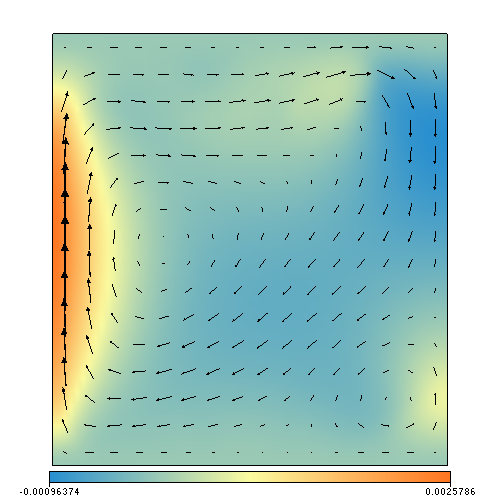

In [12]:
Fig = glucifer.Figure(figsize=(500, 500))
Fig.Surface(Model.mesh, Model.velocityField[1])
Fig.VectorArrows(Model.mesh, Model.velocityField)
Fig.show()


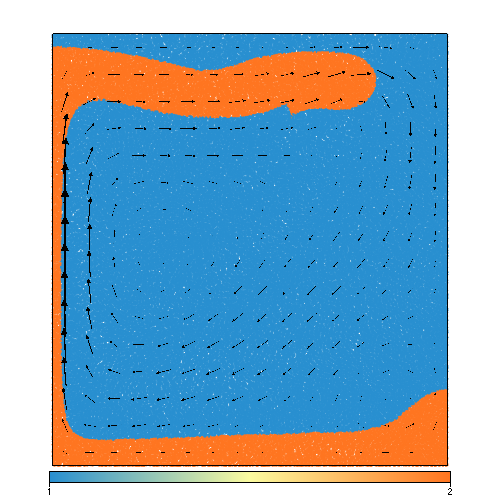

In [13]:
Fig = glucifer.Figure(figsize=(500, 500))
Fig.Points(Model.swarm, Model.materialField, fn_size=3.0)
Fig.VectorArrows(Model.mesh, Model.velocityField)
Fig.show()